# Analyse descriptive

Ce notebook est consacré à plusieurs analyses descriptives des données de la Formula 1 depuis 2018. Trois axes principaux sont abordés :

- Analyse descriptive de la météo : Cette section explore les statistiques liées aux conditions météorologiques lors des courses, ainsi que leur distribution. Un boxplot est également présenté pour visualiser la variabilité des conditions de course.

- Analyse descriptive des courses : Nous analysons le nombre de courses par saison depuis 2018 et identifions les grands prix clés de chaque saison. Cette analyse permet de mieux comprendre l'évolution du nombre de courses et les événements majeurs survenus dans le championnat.

- Analyse descriptive des résultats : Cette partie se concentre sur les performances des pilotes depuis 2018. Nous calculons des statistiques pour le classement des pilotes et présentons le Top 10 des pilotes ainsi que les champions de chaque saison. L'objectif est d'identifier les pilotes ayant marqué l'histoire récente de la Formula 1.

Ces analyses descriptives visent à fournir une vue d'ensemble des tendances et des évolutions dans le monde de la Formula 1, en mettant l'accent sur les aspects météorologiques, les courses et les performances des pilotes.

## 1. Chargement des packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Chargement des données

In [2]:
# Chargement des données 

meteo_cleaned = pd.read_csv('Cleaned_Data/meteo_cleaned.csv')
# Convertir la colonne "Time" en timedelta
meteo_cleaned['Time'] = pd.to_timedelta(meteo_cleaned['Time'])
courses_cleaned = pd.read_csv('Cleaned_Data/courses_cleaned.csv')
# Convertir la colonne "Time" en timedelta
courses_cleaned['date & time'] = pd.to_datetime(courses_cleaned['date & time'], errors='coerce')

pilotes_cleaned = pd.read_csv('Cleaned_Data/pilotes_cleaned.csv')
resultat_cleaned = pd.read_csv('Cleaned_Data/resultat_cleaned.csv')
# Convertir la colonne "time_" en timedelta
resultat_cleaned['time_'] = pd.to_timedelta(resultat_cleaned['time_'])
# Convertir la colonne "fastestLapTime_" en timedelta
resultat_cleaned['fastestLapTime_'] = pd.to_timedelta(resultat_cleaned['fastestLapTime_'])
status_cleaned = pd.read_csv('Cleaned_Data/status_cleaned.csv')

# Afficher les dimensions de chaque dataset
print("Dimensions de 'meteo' :", meteo_cleaned.shape)
print("Dimensions de 'courses' :", courses_cleaned.shape)
print("Dimensions de 'pilotes' :", pilotes_cleaned.shape)
print("Dimensions de 'resultats' :", resultat_cleaned.shape)
print("Dimensions de 'status' :", status_cleaned.shape)

Dimensions de 'meteo' : (20430, 10)
Dimensions de 'courses' : (149, 7)
Dimensions de 'pilotes' : (859, 3)
Dimensions de 'resultats' : (2739, 11)
Dimensions de 'status' : (139, 2)


## 1. Analyse descriptive du meteo

In [3]:
# Afficher les premières lignes
meteo_cleaned.head(5)

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Round Number,Year
0,0 days 00:00:57.060000,24.1,36.2,997.1,False,38.2,294,3.0,1,2018
1,0 days 00:01:57.078000,24.0,36.3,997.1,False,38.6,273,1.4,1,2018
2,0 days 00:02:57.090000,24.0,36.3,997.1,False,38.6,273,1.4,1,2018
3,0 days 00:03:57.106000,23.9,37.2,997.0,False,38.7,287,2.3,1,2018
4,0 days 00:04:57.121000,24.2,35.8,997.1,False,38.7,309,3.5,1,2018


### 1.1 Statistiques descriptives

In [4]:
# Statistiques descriptives pour les variables numériques
meteo_cleaned.describe()

,Time,AirTemp,Humidity,Pressure,TrackTemp,WindDirection,WindSpeed,Round Number,Year
count,20430,20430.000000,20430.000000,20430.000000,20430.000000,20430.000000,20430.000000,20430.000000,20430.000000
mean,0 days 01:16:59.700136025,23.515482,55.461659,996.283607,34.937327,171.141605,1.650255,11.176407,2021.365786
std,0 days 00:48:54.688692833,5.073526,17.254360,26.185476,9.288804,103.850886,1.160239,6.228851,1.959818
min,0 days 00:00:02.224000,8.900000,5.000000,921.900000,13.800000,0.000000,0.000000,1.000000,2018.000000
25%,0 days 00:36:49.892750,19.900000,43.000000,991.000000,28.800000,93.000000,0.800000,6.000000,2020.000000
50%,0 days 01:13:33.271500,23.300000,56.000000,1007.400000,34.400000,167.000000,1.400000,11.000000,2022.000000
75%,0 days 01:51:06.292750,27.500000,66.000000,1014.000000,41.900000,256.000000,2.200000,16.000000,2023.000000
max,0 days 04:49:16.818000,37.200000,97.500000,1023.500000,67.000000,359.000000,10.100000,24.000000,2024.000000


##### Interprétation des statistiques 

- AirTemp (Température de l'air) :
Moyenne de 23.66°C, variant de 9.2°C (min) à 37.2°C (max), avec une majorité des valeurs entre 19.7°C (25%) et 27.7°C (75%), ce qui indique des températures modérées à chaudes.

- Humidity (Humidité) :
Moyenne de 55.77%, avec une grande dispersion (écart-type de 17.06%), allant de 5% (min) à 97.5% (max). La plupart des valeurs sont concentrées entre 44% et 66.2%.

- Pressure (Pression) :
Moyenne de 1003.97 hPa, avec une faible variation (écart-type de 14.72), indiquant une pression atmosphérique relativement stable, majoritairement entre 995.9 hPa et 1014.9 hPa.

- TrackTemp (Température de la piste) :
Moyenne de 34.56°C, allant de 13.8°C à 67.0°C, montrant une large plage. La plupart des valeurs se situent entre 28.7°C et 41.0°C, ce qui reflète des conditions souvent chaudes.

- WindDirection (Direction du vent) :
Moyenne de 171.78°, couvrant toute la plage de 0° à 359°. L'écart-type élevé (105.52°) montre des directions de vent très variées.

- WindSpeed (Vitesse du vent) :
Moyenne de 1.67 m/s, avec des valeurs majoritairement faibles, bien que des vitesses extrêmes atteignent 10.1 m/s. La plupart des vitesses sont comprises entre 0.8 m/s et 2.2 m/s.

- Round Number (Numéro de la manche) :
Moyenne de 10.69, allant de 1 à 24, indiquant que les données couvrent plusieurs manches d'une saison de F1.

- Year (Année) :
Données s’étalant de 2018 à 2024, avec une moyenne en 2021, montrant une bonne couverture temporelle.

Ces statistiques mettent en évidence une cohérence générale des conditions météorologiques avec quelques variations extrêmes possibles.

### 1.2 Analyse Univarié

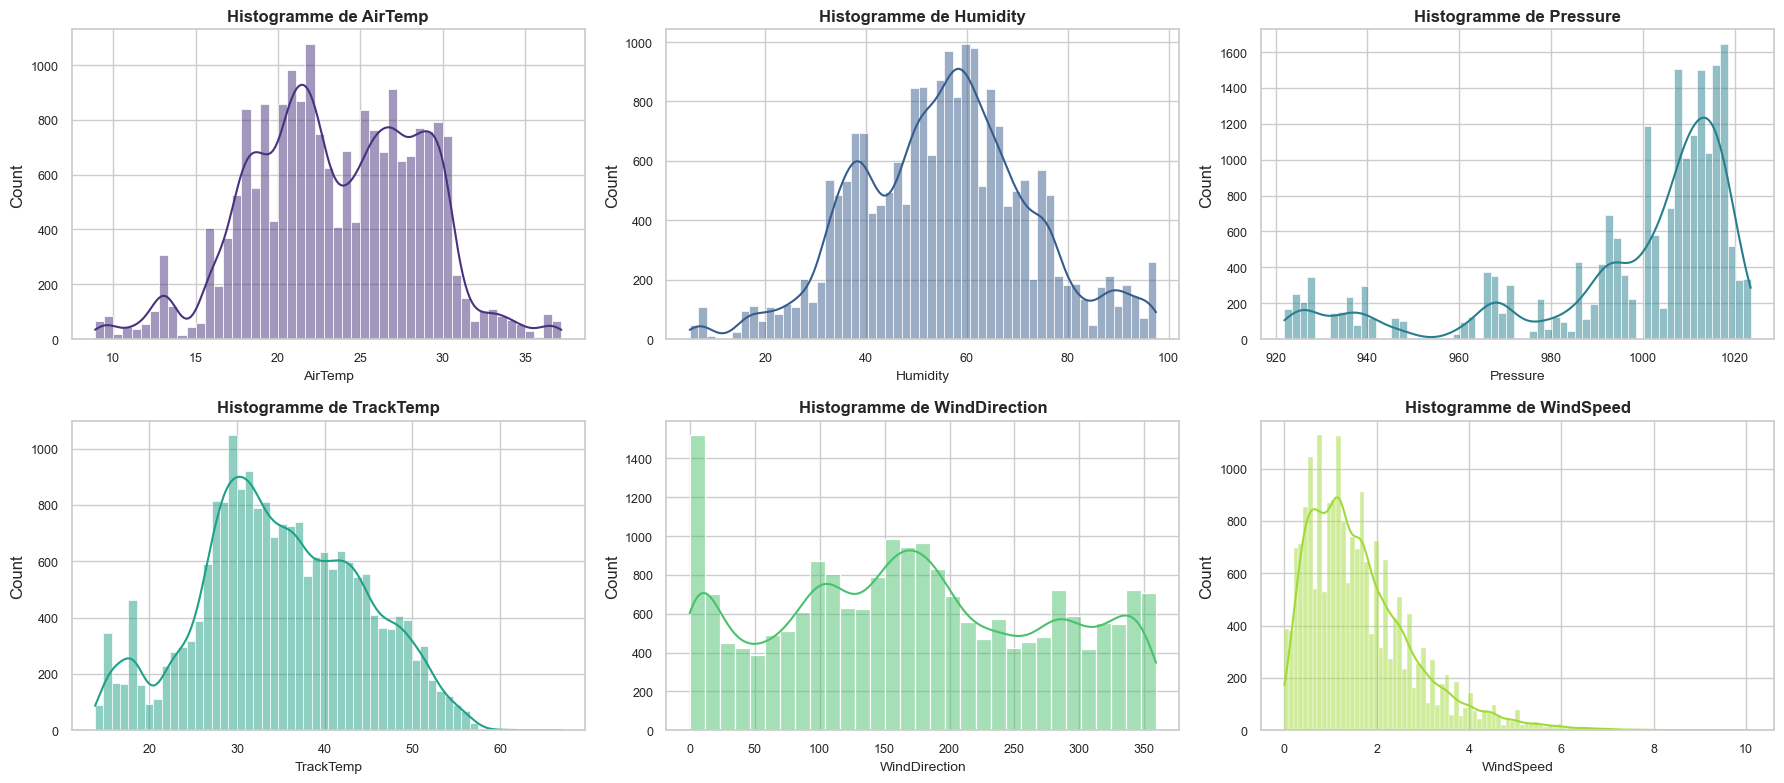

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_single_dimension_data(df):
    """
    Visualisation stylisée des données à une dimension pour chaque colonne numérique d'un DataFrame.
    
    Parameters:
    df (DataFrame) : Le DataFrame contenant les données numériques à visualiser.
    """
    # Définir un thème pour Seaborn
    sns.set_theme(style="whitegrid")  # Autres options : "darkgrid", "ticks", etc.
    
    # Palette de couleurs
    palette = sns.color_palette("viridis", len(df.select_dtypes(['int', 'float', 'timedelta64']).columns))
    
    # Sélectionner les colonnes numériques
    numeric_columns = df.select_dtypes(['int', 'float', 'timedelta64'])
    
    # Calculer le nombre de colonnes et de lignes nécessaires pour afficher tous les graphiques
    n_cols = 3  # Nombre de colonnes par ligne
    n_rows = (len(numeric_columns.columns) + n_cols - 1) // n_cols  # Nombre de lignes nécessaires
    
    # Créer une figure avec plusieurs sous-graphes
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
    axes = axes.flatten()  # Aplatir les axes pour un accès facile
    
    # Itérer sur chaque colonne numérique et afficher un graphique approprié
    for i, column in enumerate(numeric_columns.columns):
        ax = axes[i]
        if 'Time' in column:  # Si la colonne est temporelle, afficher un graphique en ligne
            ax.plot(df['Time'], df[column], label=column, color=palette[i % len(palette)], linewidth=2)
            ax.set_title(f'Courbe de {column}', fontsize=12, fontweight='bold')
            ax.set_xlabel('Temps', fontsize=10)
            ax.set_ylabel(column, fontsize=10)
            ax.legend()
        else:  # Sinon, afficher un histogramme avec courbe de densité
            sns.histplot(df[column], kde=True, color=palette[i % len(palette)], ax=ax)
            ax.set_title(f'Histogramme de {column}', fontsize=12, fontweight='bold')
            ax.set_xlabel(column, fontsize=10)
        
        # Ajuster le style des ticks
        ax.tick_params(axis='both', which='major', labelsize=9)
    
    # Supprimer les sous-graphes inutilisés
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Ajuster l'espacement entre les sous-graphes
    plt.tight_layout()
    
    # Afficher les graphiques
    plt.show()

# Exemple d'utilisation
columns = [ 'AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed']
visualize_single_dimension_data(meteo_cleaned[columns])

##### Interprétation des distributions :
- Time : la variable time est linéaire. Ce qui est tout à fait logique.
- WindSpeed (Vitesse du vent) : La distribution semble etre asymétrique, avec la majorité des valeurs faibles et quelques valeurs élevées.

- Autres variables (humidity, pressure, tracktemp, airtemp) : Les distributions sont de forme variable, sans tendance claire, ce qui indique une diversité dans les conditions météorologiques.

### 1.3 Boxplot

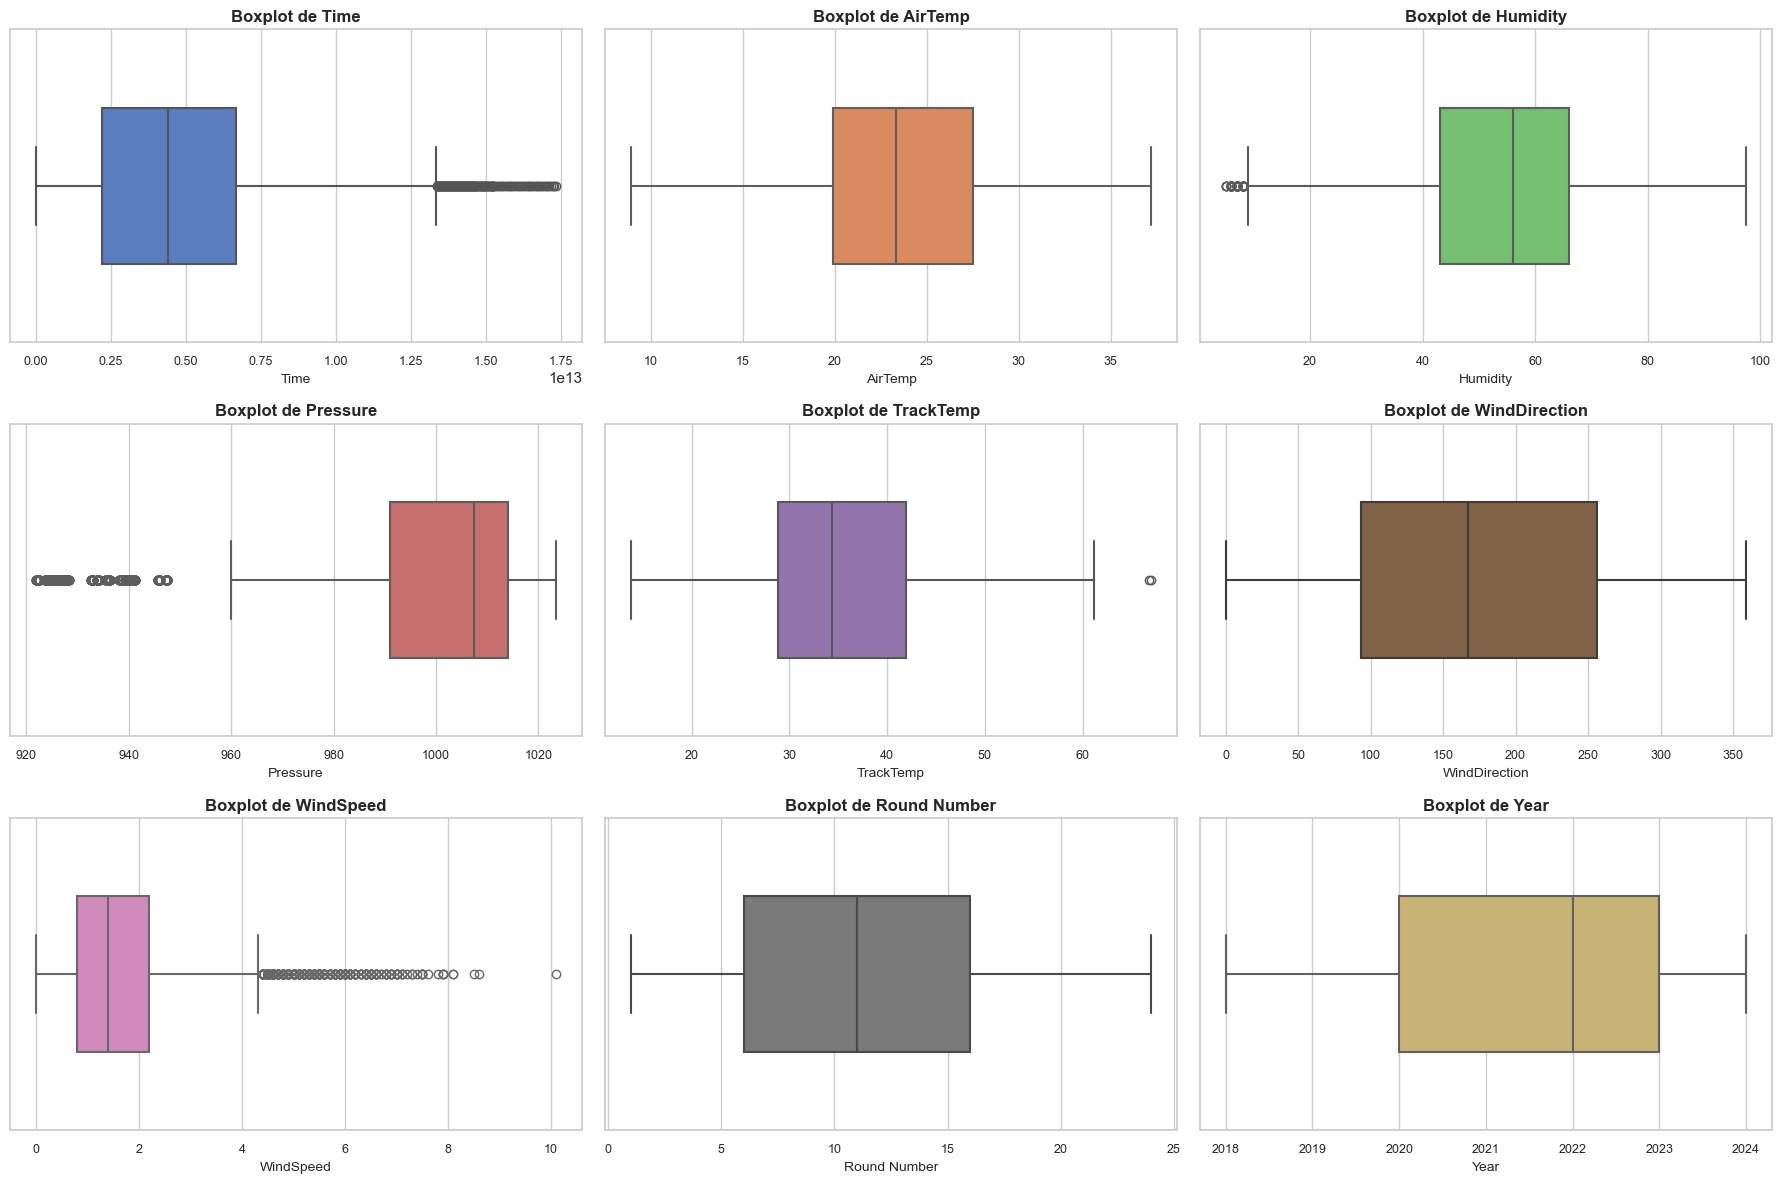

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplots(df):
    """
    Visualisation stylisée des boxplots pour chaque colonne numérique d'un DataFrame.
    
    Parameters:
    df (DataFrame) : Le DataFrame contenant les données numériques pour lesquelles générer les boxplots.
    """
    # Définir un thème pour Seaborn
    sns.set_theme(style="whitegrid")
    
    # Sélectionner les colonnes numériques
    numeric_columns = df.select_dtypes(['int', 'float', 'timedelta64'])
    
    # Palette de couleurs
    palette = sns.color_palette("muted", len(numeric_columns.columns))
    
    # Calculer le nombre de colonnes et de lignes nécessaires pour afficher tous les graphiques
    n_cols = 3  # Nombre de colonnes par ligne
    n_rows = (len(numeric_columns.columns) + n_cols - 1) // n_cols  # Nombre de lignes nécessaires
    
    # Créer une figure avec plusieurs sous-graphes
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
    axes = axes.flatten()  # Aplatir les axes pour un accès facile
    
    # Itérer sur chaque colonne numérique et afficher le boxplot
    for i, column in enumerate(numeric_columns.columns):
        ax = axes[i]
        sns.boxplot(data=df, x=column, ax=ax, color=palette[i % len(palette)], width=0.5, linewidth=1.5)
        ax.set_title(f'Boxplot de {column}', fontsize=12, fontweight='bold')
        ax.set_xlabel(column, fontsize=10)
        
        # Améliorer les ticks pour lisibilité
        ax.tick_params(axis='both', which='major', labelsize=9)
    
    # Supprimer les sous-graphes inutilisés
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Ajuster l'espacement entre les sous-graphes
    plt.tight_layout()
    
    # Afficher les graphiques
    plt.show()

# Exemple d'utilisation
plot_boxplots(meteo_cleaned)

Interprétation des Boxplots
- Humidity (Humidité) :
Des valeurs extrêmes sont observées, mais elles correspondent probablement à des conditions météorologiques variées pendant les courses. Elles semblent valides.

- Pressure (Pression atmosphérique) :
Des valeurs extrêmes apparaissent, probablement liées à des changements climatiques rapides ou des tempêtes. Ces valeurs sont acceptables.

- Tracktemp (Température de la piste) :
Les valeurs extrêmes reflètent des fluctuations normales de la température de la piste, liées aux conditions de course. Elles sont légitimes.

- Windspeed (Vitesse du vent) :
Les valeurs extrêmes sont dues aux rafales de vent pendant les courses, et sont donc valides.

- Airtemp (Température de l'air) :
Les valeurs sont homogènes, ce qui reflète des conditions climatiques prévisibles et stables lors des courses.



## 2. Analyse descriptive des courses

In [7]:
# Afficher les 5 premières lignes
courses_cleaned.head()

,raceId,year,round,circuitId,name,url,date & time
0,989,2018,1,1,Australian Grand Prix,http://en.wikipedia.org/wiki/2018_Australian_G...,2018-03-25 05:10:00
1,990,2018,2,3,Bahrain Grand Prix,http://en.wikipedia.org/wiki/2018_Bahrain_Gran...,2018-04-08 15:10:00
2,991,2018,3,17,Chinese Grand Prix,http://en.wikipedia.org/wiki/2018_Chinese_Gran...,2018-04-15 06:10:00
3,992,2018,4,73,Azerbaijan Grand Prix,http://en.wikipedia.org/wiki/2018_Azerbaijan_G...,2018-04-29 12:10:00
4,993,2018,5,4,Spanish Grand Prix,http://en.wikipedia.org/wiki/2018_Spanish_Gran...,2018-05-13 13:10:00


In [8]:
### 2.1 Statistiques descriptives numériques
courses_cleaned.describe()

,raceId,year,round,circuitId,date & time
count,149.000000,149.000000,149.000000,149.000000,149
mean,1066.234899,2021.107383,11.234899,30.382550,2021-09-11 15:29:55.973154304
min,989.000000,2018.000000,1.000000,1.000000,2018-03-25 05:10:00
25%,1026.000000,2019.000000,6.000000,9.000000,2019-10-13 05:10:00
50%,1066.000000,2021.000000,11.000000,18.000000,2021-10-10 12:00:00
75%,1107.000000,2023.000000,16.000000,69.000000,2023-07-02 13:00:00
max,1144.000000,2024.000000,24.000000,80.000000,2024-12-08 13:00:00
std,45.958764,2.037291,6.305713,27.525565,NaN


Les données des courses couvrent la période de 2018 à 2024, avec un total de 149 courses, réparties sur un 80 circuit. Les saisons vont de 2018 à 2024, avec une concentration des courses autour des années récentes (2021-2024). Les courses sont organisées sur une variété de circuits, certains apparaissant plus fréquemment que d'autres.

In [9]:
### 2.1 Statistiques descriptives catégorielles
courses_cleaned.describe(include = 'object')

,name,url
count,149,149
unique,36,149
top,Italian Grand Prix,http://en.wikipedia.org/wiki/2018_Australian_G...
freq,7,1


Il y a eu 36 Grands Prix différents depuis 2018, avec l'Italian Grand Prix étant l'un des plus populaires, ayant eu lieu 7 fois.

### Nombre de courses par saison depuis 2018

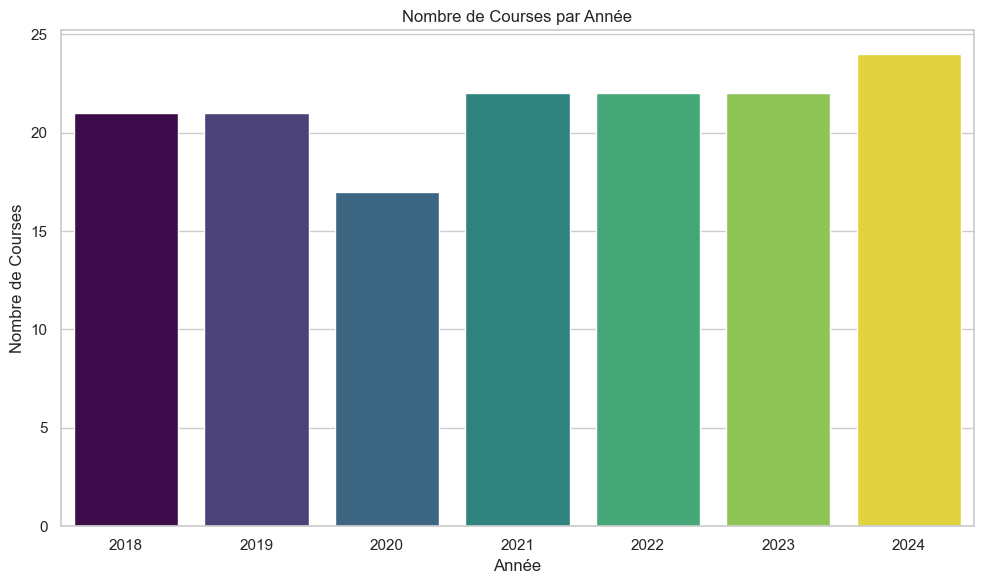

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_courses_per_year(courses_cleaned):
    """
    Visualisation du nombre de courses par année à partir de la colonne 'year'.
    
    Parameters:
    courses_cleaned (DataFrame) : Le DataFrame contenant les informations sur les courses.
    """
    # Compter le nombre de courses par année
    year_counts = courses_cleaned['year'].value_counts().sort_index()

    # Créer un barplot pour afficher les courses par année
    plt.figure(figsize=(10, 6))
    sns.barplot(x=year_counts.index, y=year_counts.values, hue=year_counts.index, palette='viridis', legend=False)

    # Ajouter des titres et labels
    plt.title('Nombre de Courses par Année')
    plt.xlabel('Année')
    plt.ylabel('Nombre de Courses')

    # Afficher le graphique
    plt.tight_layout()
    plt.show()

# Utilisation de la fonction
plot_courses_per_year(courses_cleaned)

L'analyse du nombre de courses par année révèle une certaine constance dans l'organisation des Grands Prix de la Formule 1, à l'exception notable de l'année 2020. En effet, la saison 2020 a comptabilisé seulement 17 courses, ce qui est inférieur à la moyenne des autres années. Cette baisse est principalement due à l'impact de la pandémie de COVID-19, qui a perturbé le calendrier de nombreuses compétitions sportives, y compris la F1. Des restrictions de voyage et des mesures sanitaires ont contraint les organisateurs à annuler ou reporter plusieurs événements.

En revanche, les années 2021, 2022, 2023 et 2024 ont retrouvé un nombre de courses plus proche de la normale, avec 22 à 24 courses par saison, indiquant que la F1 a pu se stabiliser après la crise sanitaire mondiale.

### Fréquence des grands prix

/var/folders/l9/dhmb1tyx1h37xyzk_tmmg0hr0000gn/T/ipykernel_12292/1047972480.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prix_counts.values, y=prix_counts.index, palette='viridis', legend=False)


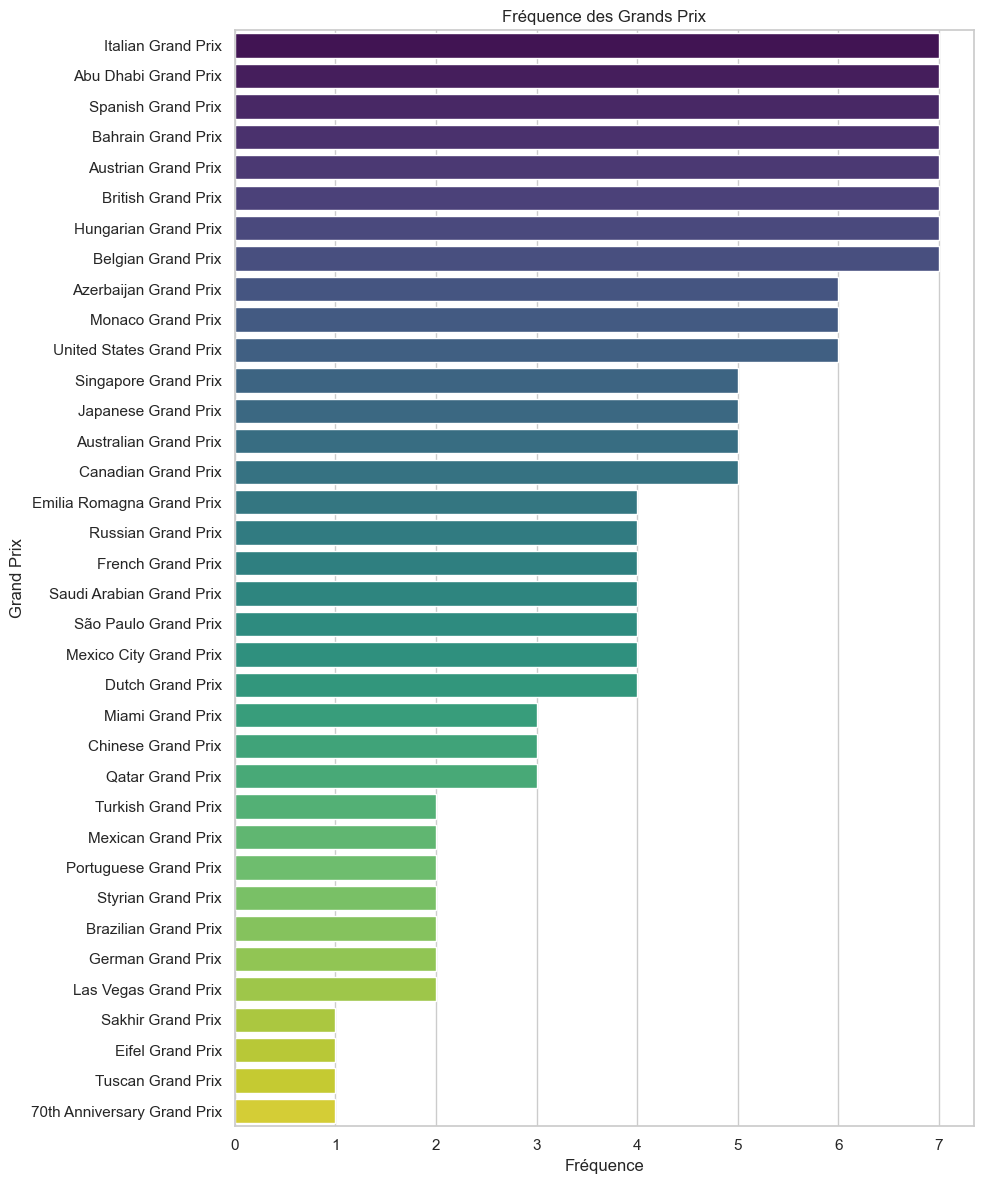

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_grand_prix_vertical(courses_cleaned):
    """
    Visualisation verticale de la fréquence des grands prix (nom) dans le DataFrame.
    
    Parameters:
    courses_cleaned (DataFrame) : Le DataFrame contenant les informations sur les grands prix.
    """
    # Compter la fréquence de chaque grand prix
    prix_counts = courses_cleaned['name'].value_counts()

    # Créer un barplot vertical
    plt.figure(figsize=(10, 12))
    sns.barplot(x=prix_counts.values, y=prix_counts.index, palette='viridis', legend=False)

    # Ajouter des titres et labels
    plt.title('Fréquence des Grands Prix')
    plt.ylabel('Grand Prix')
    plt.xlabel('Fréquence')

    # Afficher le graphique
    plt.tight_layout()
    plt.show()

# Utilisation de la fonction
plot_grand_prix_vertical(courses_cleaned)

Les grands prix les plus fréquents sont :

- Italian Grand Prix
- Abu Dhabi Grand Prix
- Spanish Grand Prix
- Bahrain Grand Prix
- Austrian Grand Prix
- British Grand Prix
- Hungarian Grand Prix
- Belgian Grand Prix

Ces grands prix, très populaires et traditionnels, accueillent souvent plusieurs courses au cours des saisons, en raison de leur engagement historique et de leur grande visibilité auprès des spectateurs et des médias.

## 3. Analyse descriptive des resultats

In [12]:
# Afficher les 5 premières lignes
resultat_cleaned.head()

,resultId,raceId,driverId,positionOrder,points,laps,rank,statusId,time_,fastestLapTime_,fastestLapSpeed_
0,23782,989,20,1,25.0,58,4,1,0 days 01:29:33.283000,0 days 00:01:26.469000,220.782
1,23783,989,1,2,18.0,58,3,1,0 days 01:29:38.319000,0 days 00:01:26.444000,220.845
2,23784,989,8,3,15.0,58,2,1,0 days 01:29:39.592000,0 days 00:01:26.373000,221.027
3,23785,989,817,4,12.0,58,1,1,0 days 01:29:40.352000,0 days 00:01:25.945000,222.128
4,23786,989,4,5,10.0,58,7,1,0 days 01:30:01.169000,0 days 00:01:26.978000,219.489


In [13]:
resultat_cleaned.describe()

,resultId,raceId,driverId,positionOrder,points,laps,rank,statusId,time_,fastestLapTime_,fastestLapSpeed_
count,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,1520,2739,2739.000000
mean,25154.359620,1059.882074,689.560789,10.496532,5.071376,54.529390,9.734940,9.265060,0 days 01:37:17.400503289,0 days 00:01:28.217748947,210.585246
std,791.739487,42.226964,313.249402,5.765528,7.222459,17.428476,5.893304,21.690966,0 days 00:21:26.208374651,0 days 00:00:11.536107006,19.529999
min,23782.000000,989.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0 days 00:03:27.071000,0 days 00:00:55.404000,128.135000
25%,24470.500000,1023.000000,815.000000,5.500000,0.000000,51.000000,5.000000,1.000000,0 days 01:27:45.568250,0 days 00:01:19.461500,200.578500
50%,25155.000000,1060.000000,832.000000,10.000000,0.500000,56.000000,10.000000,1.000000,0 days 01:33:25.518000,0 days 00:01:28.217748947,210.585246
75%,25839.500000,1096.000000,845.000000,15.000000,9.000000,67.000000,15.000000,11.000000,0 days 01:41:07.538000,0 days 00:01:36.605000,224.323500
max,26524.000000,1132.000000,860.000000,20.000000,26.000000,87.000000,20.000000,141.000000,0 days 03:03:32.095000,0 days 00:02:14.103000,255.014000


#### Interprétation des statistiques
- resultId, raceId, driverId : Ce sont des identifiants uniques pour les résultats, les courses et les pilotes. Ils permettent de relier les différentes données et suivent une distribution séquentielle, sans impact direct sur les performances.

- positionOrder : Représente la position finale des pilotes, allant de 1 à 20. La médiane (10) montre une répartition équilibrée, avec une majorité de pilotes finissant dans la partie inférieure du classement.

- points : Le nombre moyen de points obtenus par pilote est de 5,07, avec une médiane de 0,5. Cela reflète qu'une grande majorité de pilotes marquent peu de points, tandis que certains pilotes marquent beaucoup, surtout dans les premières positions.

- laps : Le nombre moyen de tours complets est de 54,5, avec une variation modérée (écart-type de 17,43), ce qui peut refléter les différences de longueur de course ou les abandons.

- rank : La position relative des pilotes varie entre 0 et 20, avec une moyenne de 9,73 et une médiane de 10. Cela montre que la plupart des pilotes se situent dans la moitié inférieure du classement, mais il y a une certaine dispersion.

- statusId : Représente le statut de la course, allant de 1 à 141, ce qui couvre une gamme de résultats possibles, y compris les abandons et les différentes classifications.

- time_ : Le temps total de la course varie entre 3 minutes et 3 heures. Le temps moyen est d'environ 1 heure 37 minutes, avec une variation considérable. Cela reflète la durée des courses, qui peuvent varier en fonction des arrêts, des accidents, ou des conditions de course.

- fastestLapTime_ : Le temps du tour le plus rapide varie de 55 secondes à 2 minutes 14 secondes. Le temps moyen est d'environ 1 minute 28 secondes. Cela indique que les temps des tours rapides varient légèrement selon les circuits et les conditions de course, mais restent relativement constants au niveau des meilleurs temps.

- fastestLapSpeed_ : La vitesse moyenne du tour le plus rapide est de 210,6 km/h, avec une variation allant jusqu'à 255 km/h. Cela reflète les différences de performance entre les pilotes et les circuits, avec des vitesses plus élevées pour les circuits rapides et des conditions idéales.

En résumé, ces statistiques montrent une compétition où la majorité des pilotes finissent dans la partie inférieure du classement, avec des écarts importants en termes de points, de temps et de vitesse. Les variables de temps, comme time_ et fastestLapTime_, montrent des différences notables dans la durée des courses et les performances des pilotes.

### Analyse univariée

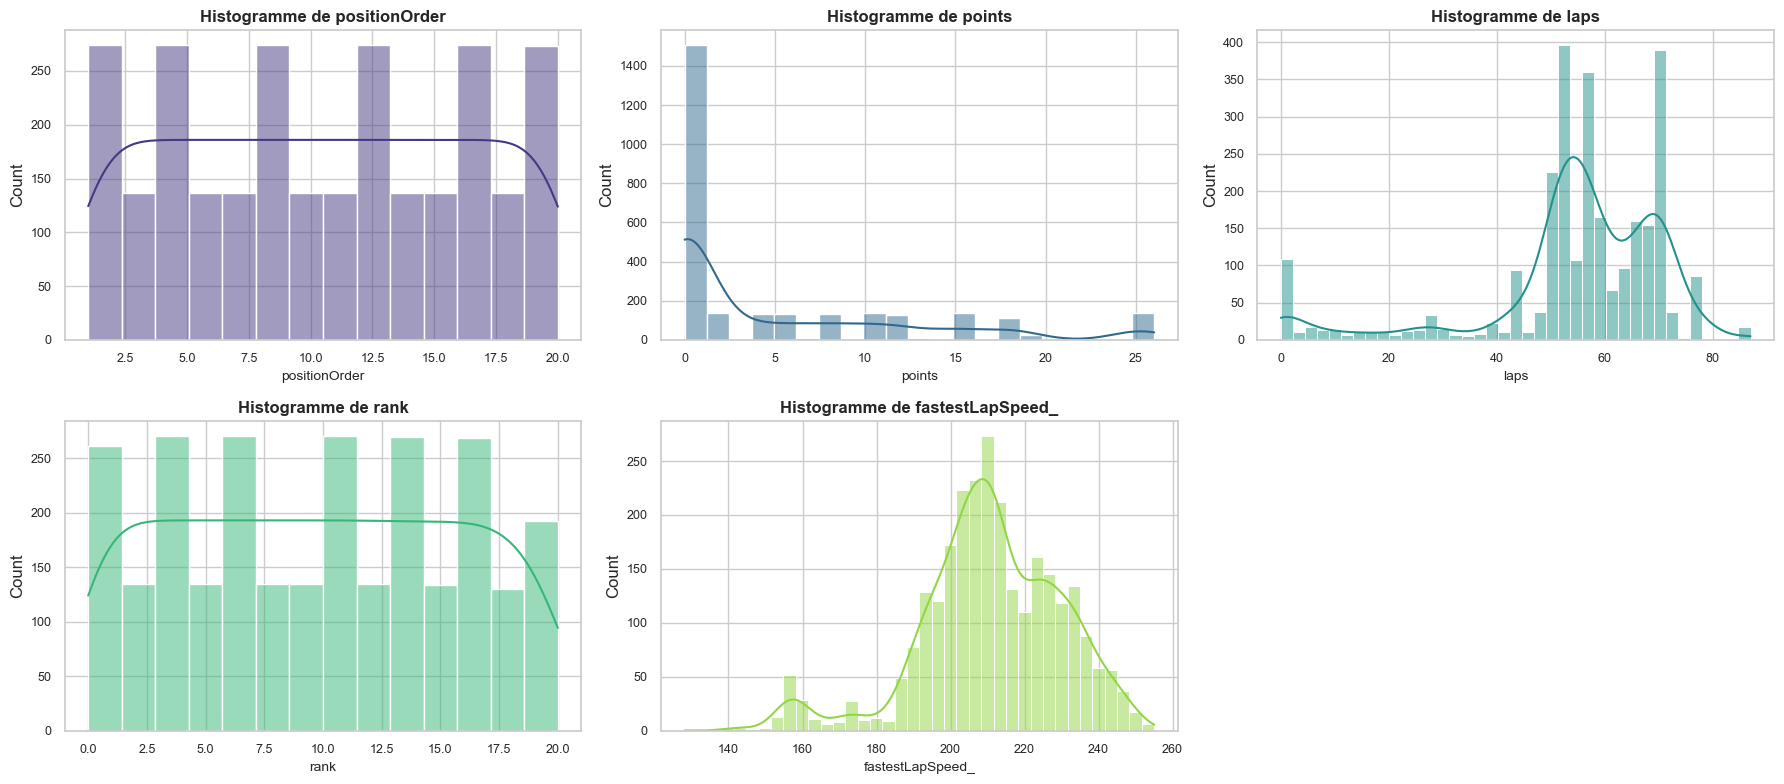

In [14]:
# Visualisation des variables de performance numérique des pilotes en F1
columns = ['positionOrder', 'points', 'laps', 'rank', 'fastestLapSpeed_']
visualize_single_dimension_data(resultat_cleaned[columns])

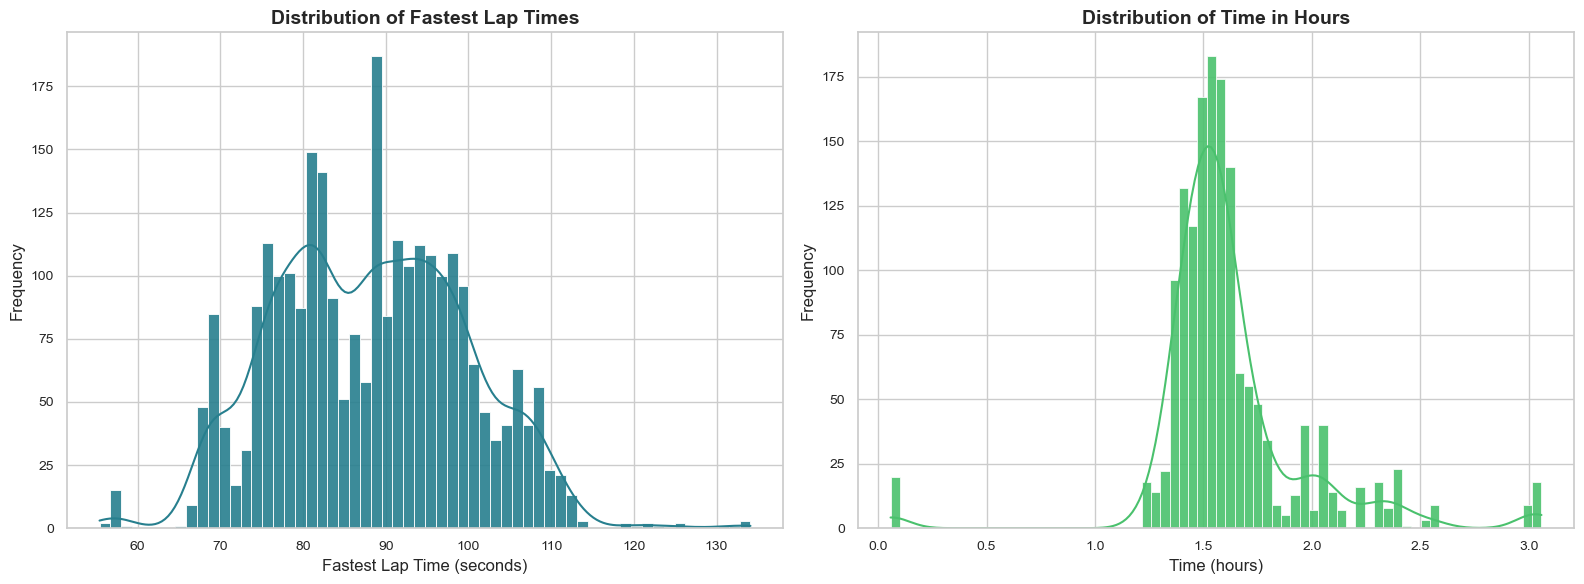

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration globale pour un style cohérent
sns.set_style("whitegrid")  # Style de grille
palette = sns.color_palette("viridis")  # Palette de couleurs

# Créer une figure avec deux sous-graphiques (1 ligne, 2 colonnes)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Taille ajustée pour une présentation optimale

# Premier graphique : Distribution des Fastest Lap Times avec KDE
sns.histplot(resultat_cleaned['fastestLapTime_'].dt.total_seconds(), kde=True, 
             bins=60, color=palette[2], edgecolor='white', alpha=0.9, ax=axes[0])
axes[0].set_xlabel('Fastest Lap Time (seconds)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Fastest Lap Times', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='both', which='major', labelsize=10)

# Deuxième graphique : Distribution des Time en heures avec KDE
sns.histplot(resultat_cleaned['time_'].dropna().dt.total_seconds() / 3600, kde=True, 
             bins=70, color=palette[4], edgecolor='white', alpha=0.9, ax=axes[1])
axes[1].set_xlabel('Time (hours)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Distribution of Time in Hours', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='both', which='major', labelsize=10)

# Ajuster l'espacement entre les subplots pour éviter le chevauchement
plt.tight_layout()

# Afficher les graphiques
plt.show()

### Boxplot

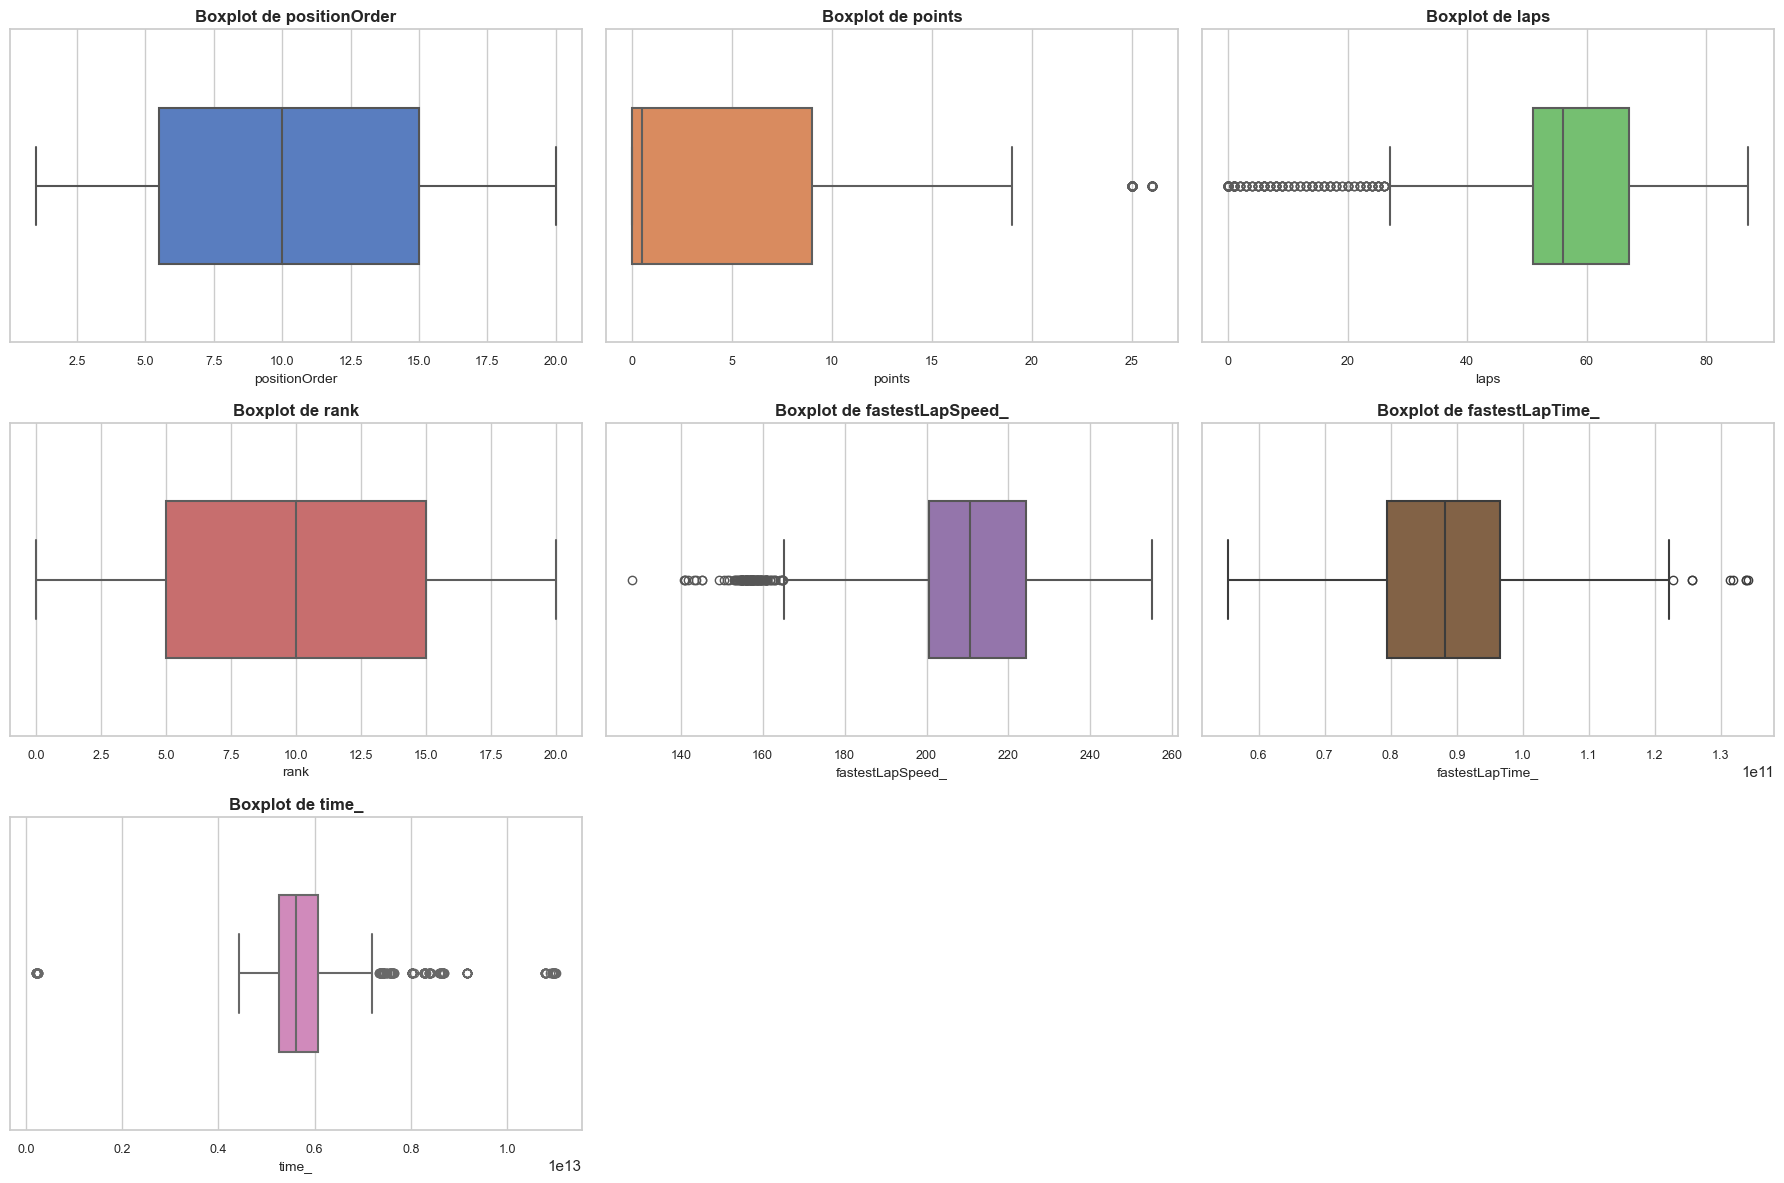

In [16]:
columns = ['positionOrder', 'points', 'laps', 'rank', 'fastestLapSpeed_', 'fastestLapTime_', 'time_']
plot_boxplots(resultat_cleaned[columns])

### Top 10 des pilotes depuis 2018

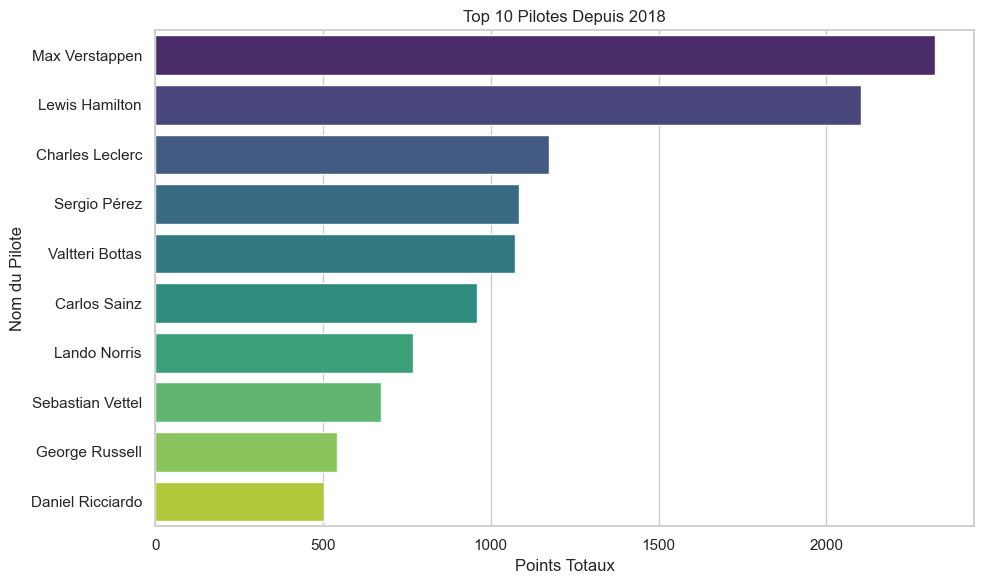

            fullname  points
20    Max Verstappen  2323.5
16    Lewis Hamilton  2103.5
4    Charles Leclerc  1172.0
34      Sergio Pérez  1085.0
36   Valtteri Bottas  1072.0
3       Carlos Sainz   957.5
15      Lando Norris   768.0
32  Sebastian Vettel   673.0
9     George Russell   543.0
5   Daniel Ricciardo   503.0


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fusionner les résultats des courses avec les informations des pilotes pour obtenir les noms complets
resultat_with_names = pd.merge(resultat_cleaned, pilotes_cleaned[['driverId', 'fullname']], on='driverId')

# Regrouper les résultats par pilote et calculer le total des points pour chaque pilote
total_points = resultat_with_names.groupby('fullname')['points'].sum().reset_index()

# Trier les pilotes par les points (décroissant) et sélectionner les 10 meilleurs
top_pilotes = total_points.sort_values(by='points', ascending=False).head(10)

# Afficher les résultats sous forme de graphique
plt.figure(figsize=(10, 6))
sns.barplot(x='points', y='fullname', data=top_pilotes, palette='viridis', legend=False, hue='fullname')
plt.title('Top 10 Pilotes Depuis 2018')
plt.xlabel('Points Totaux')
plt.ylabel('Nom du Pilote')
plt.tight_layout()
plt.show()

# Afficher les résultats sous forme de tableau pour plus de détails
print(top_pilotes[['fullname', 'points']])

### Les champions du Formula 1 depuis 2018

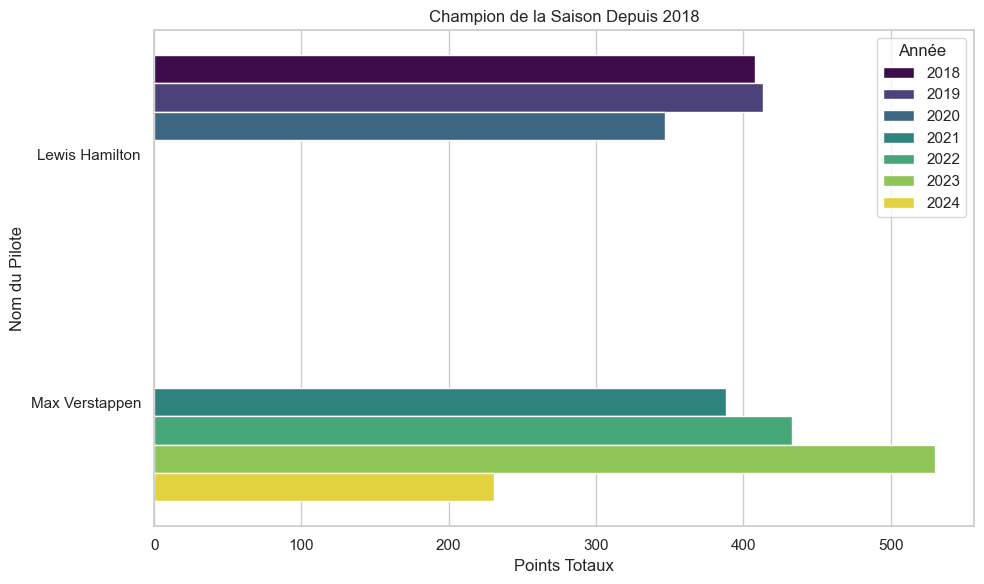

     year        fullname  points
9    2018  Lewis Hamilton   408.0
31   2019  Lewis Hamilton   413.0
53   2020  Lewis Hamilton   347.0
74   2021  Max Verstappen   388.5
96   2022  Max Verstappen   433.0
120  2023  Max Verstappen   530.0
141  2024  Max Verstappen   231.0


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fusionner le DataFrame 'resultat_cleaned' avec 'courses_cleaned' pour obtenir l'année des courses
resultat_with_year = pd.merge(resultat_cleaned, courses_cleaned[['raceId', 'year']], on='raceId', how='left')

# Fusionner le DataFrame des résultats avec les informations des pilotes pour obtenir le nom complet
resultat_with_names = pd.merge(resultat_with_year, pilotes_cleaned[['driverId', 'fullname']], on='driverId')

# Regrouper par année et pilote et calculer le total des points pour chaque pilote par année
points_by_year = resultat_with_names.groupby(['year', 'fullname'])['points'].sum().reset_index()

# Trier par année puis par points de manière décroissante
points_by_year_sorted = points_by_year.sort_values(by=['year', 'points'], ascending=[True, False])

# Sélectionner le champion (le pilote avec le plus de points) pour chaque saison
champions_per_year = points_by_year_sorted.groupby('year').head(1)

# Afficher les résultats sous forme de graphique
plt.figure(figsize=(10, 6))
sns.barplot(x='points', y='fullname', hue='year', data=champions_per_year, palette='viridis')
plt.title('Champion de la Saison Depuis 2018')
plt.xlabel('Points Totaux')
plt.ylabel('Nom du Pilote')
plt.legend(title='Année', loc='upper right')
plt.tight_layout()
plt.show()

# Afficher les résultats sous forme de tableau
print(champions_per_year[['year', 'fullname', 'points']])

### Nuage des différents status de Formula 1

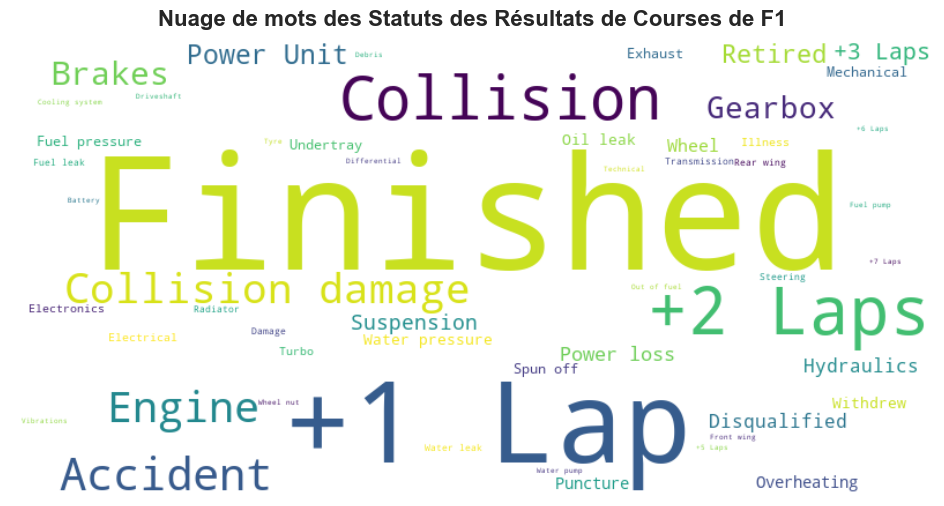

In [19]:
from wordcloud import WordCloud

# Fusionner les datasets pour associer statusId à status
merged_data = pd.merge(resultat_cleaned, status_cleaned, how='left', on='statusId')

# Calculer les fréquences des statuts
status_frequencies = merged_data['status'].value_counts()

# Générer le nuage de mots
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    prefer_horizontal=1.0
).generate_from_frequencies(status_frequencies)

# Afficher le nuage de mots
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Supprimer les axes pour une meilleure lisibilité
plt.title('Nuage de mots des Statuts des Résultats de Courses de F1', fontsize=16, fontweight='bold')
plt.show()